In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Flatten
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test  = X_test.reshape(X_test.shape[0], 28*28)

# Normalisasi
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255


In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [6]:
# Gabungkan fitur dan label
train_df = pd.DataFrame(X_train)
train_df['label'] = np.argmax(y_train, axis=1)

test_df = pd.DataFrame(X_test)
test_df['label'] = np.argmax(y_test, axis=1)

train_df.to_csv("mnist_train.csv", index=False)
test_df.to_csv("mnist_test.csv", index=False)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
model = Sequential()

# Input layer + hidden layer 1
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer (10 kelas: 0–9)
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8217 - loss: 0.5721 - val_accuracy: 0.9594 - val_loss: 0.1318
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9568 - loss: 0.1493 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9695 - loss: 0.0974 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9763 - loss: 0.0766 - val_accuracy: 0.9758 - val_loss: 0.0807
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9799 - loss: 0.0632 - val_accuracy: 0.9789 - val_loss: 0.0746
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9798 - val_loss: 0.0726
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9856 - loss: 0.0435 - val_accuracy: 0.9774 - val_loss: 0.0786
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9866 - loss: 0.0434 - val_ac

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss     :", test_loss)
print("Test Accuracy :", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0818
Test Loss     : 0.06771061569452286
Test Accuracy : 0.978600025177002


In [14]:
import matplotlib.pyplot as plt


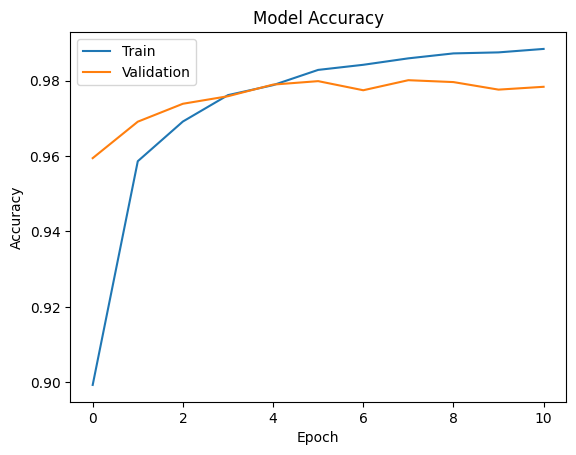

In [15]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


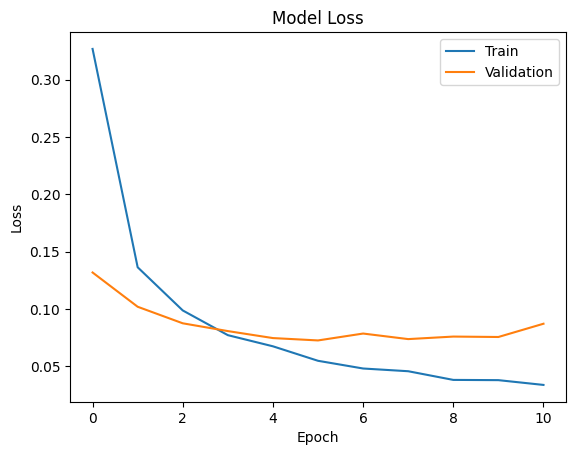

In [16]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


In [17]:
import numpy as np

pred = model.predict(X_test[:1])
print("Prediksi :", np.argmax(pred))
print("Label asli :", np.argmax(y_test[:1]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediksi : 7
Label asli : 7
